로지스틱 회귀는 이벤트가 발생할 확률을 결정하는 데 사용되는 통계 모델입니다. 특성 간의 관계를 보여주고 특정 결과의 확률을 계산합니다.

In [3]:
import enum, random
class Coin(enum.Enum):
  FRONT=0
  BACK=1
  def random_coin():
    return random.choice([Coin.FRONT, Coin.BACK])

In [6]:
for _ in range(20):
  if Coin.random_coin() == Coin.FRONT:
    print(".", end=' ')
  else:
    print("1", end=' ')


1 1 1 1 . . . 1 . . . 1 . . 1 . 1 . 1 1 

만약에 동전을 두 번 던졌을 때 P(both|first)와 P(both|either)를 구하시오.

P(both|first) 첫 번째 던졌을 때 뒷면이 나오고 둘 다 뒷면이 나올 확률

P(both|either) 둘 중 하나가 뒷면이 나오고 둘 다 뒷면이 나올 확률

In [8]:
both_back = 0 #둘다 뒷면이 나온 횟수
first_back=0 #첫번째 뒷면이 나온 횟수
either_back=0 #둘 중 하나는 뒷면이 나온 횟수

for _ in range(10000):
  first=Coin.random_coin()
  second=Coin.random_coin()
  if first == Coin.BACK:
    first_back +=1
  if first == Coin.BACK and second == Coin.BACK:
    both_back +=1
  if first==Coin.BACK or second == Coin.BACK:
    either_back +=1
print("P(both|first)",both_back/first_back) #첫번째가 뒷면이 나오고 나머지 두개가 둘다 뒷면이 나올 확률
print("P(both|either)",both_back/either_back)

P(both|first) 0.4896273917421954
P(both|either) 0.3267912353810996


In [15]:
def uniform_pdf(x): #균등 분포
  if 0<=x<1:
    return 1
  return 0

In [16]:
def uniform_cdf(x): #누적 분포
  if x<0:
    return 0
  if x<1:
    return x
  return 1

In [21]:
xs = []
pys=[]
cys=[]
#-1~-2까지 step=0.01로 균등 분포와 누적 분포를 계산하여 컬렉션에 보관
for x_100 in range(-100,200):
  pys.append(uniform_pdf(x_100/100))
  cys.append(uniform_cdf(x_100/100))
  xs.append(x_100/100)


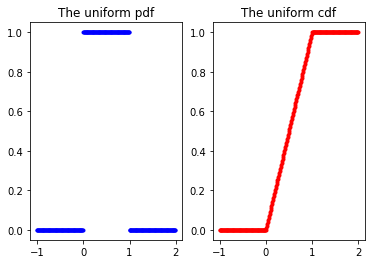

In [22]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots(1,2)
ax[0].plot(xs,pys,"b.",label="pdf")
ax[1].plot(xs,cys,"r.",label="cdf")
ax[0].set_title("The uniform pdf")
ax[1].set_title("The uniform cdf")
plt.show()
                    

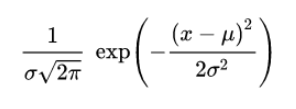
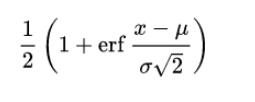




In [27]:
import math
SQRT_TWO_PI = math.sqrt(2*math.pi)
def normal_pdf(x,mu=0,sigma=1): #정규분포 (mu:평균, sigma:표준편차)
  pre = 1/(sigma*SQRT_TWO_PI)
  post = math.exp(-((x-mu)**2)/(2*(sigma**2)))
  return pre * post

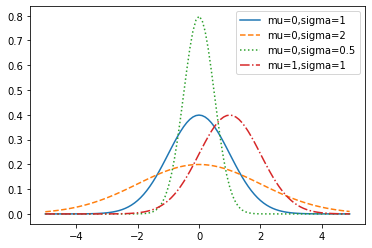

In [28]:
xs=[x/10.0 for x in range(-50,50)]
ys1=[normal_pdf(x,sigma=1) for x in xs]
ys2=[normal_pdf(x,sigma=2) for x in xs]
ys3=[normal_pdf(x,sigma=0.5) for x in xs]
ys4=[normal_pdf(x,mu=1) for x in xs]
plt.plot(xs,ys1,'-',label="mu=0,sigma=1")
plt.plot(xs,ys2,'--',label="mu=0,sigma=2")
plt.plot(xs,ys3,':',label="mu=0,sigma=0.5")
plt.plot(xs,ys4,'-.',label="mu=1,sigma=1")
plt.legend()
plt.show()

In [57]:
def normal_cdf(x,mu=0,sigma=1): #정규누적분포
  return(1+math.erf((x-mu)/(sigma*math.sqrt(2))))/2

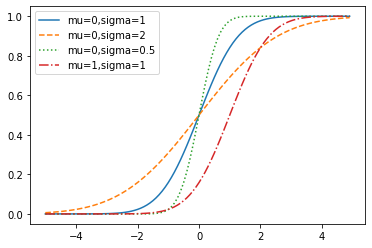

In [60]:
xs=[x/10.0 for x in range(-50,50)]
ys1=[normal_cdf(x,sigma=1) for x in xs]
ys2=[normal_cdf(x,sigma=2) for x in xs]
ys3=[normal_cdf(x,sigma=0.5) for x in xs]
ys4=[normal_cdf(x,mu=1) for x in xs]
plt.plot(xs,ys1,'-',label="mu=0,sigma=1")
plt.plot(xs,ys2,'--',label="mu=0,sigma=2")
plt.plot(xs,ys3,':',label="mu=0,sigma=0.5")
plt.plot(xs,ys4,'-.',label="mu=1,sigma=1")
plt.legend()
plt.show()

베르누이 시행

In [29]:
def bernouli_trial(p):
  return 1 if random.random()<p else 0

In [31]:
cnt=0
for _ in range(1000):
  re = bernouli_trial(1/6)
  print(re,end='.') #확률이 1/6인 사건이 발생하면 1, 발생하지 않으면 0 출력
  if re ==1:
    cnt+=1
print()
print(cnt)

0.0.0.0.0.0.0.0.0.0.1.0.0.0.1.1.0.0.0.0.1.0.1.1.0.0.0.0.0.0.0.0.0.1.1.0.1.0.0.0.1.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.1.1.0.0.0.0.1.0.0.0.0.1.1.0.0.0.0.0.0.0.0.0.0.0.0.1.0.0.0.0.0.1.0.0.0.0.0.0.0.0.0.0.1.0.1.0.0.1.0.0.0.0.0.0.0.1.0.0.0.0.0.0.0.0.0.1.0.0.0.1.0.0.0.0.0.0.0.0.0.0.1.1.0.1.0.0.0.0.0.0.0.0.1.0.0.0.0.0.0.0.0.1.0.0.0.1.0.0.0.0.1.0.0.0.0.0.0.0.0.0.0.0.0.1.0.0.0.0.1.1.1.0.0.1.0.0.0.0.0.0.0.1.0.0.0.1.0.0.0.1.0.0.0.1.1.0.0.1.0.0.0.0.0.1.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.1.0.1.0.0.0.0.0.1.0.0.1.0.0.0.0.0.0.0.0.0.1.0.0.0.1.0.0.0.0.0.0.0.0.0.0.0.0.0.1.1.1.0.0.1.0.0.0.1.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.1.0.0.0.0.0.0.0.1.0.0.0.0.0.0.0.0.0.0.0.0.0.0.1.0.0.0.0.0.0.0.0.0.1.0.0.1.0.0.1.0.0.0.0.0.0.0.0.0.0.1.0.0.0.0.1.0.1.1.0.0.0.0.0.0.1.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.1.0.0.0.0.1.1.0.0.0.0.0.0.0.0.0.0.0.1.0.1.0.0.0.0.0.0.0.1.0.0.0.0.0.0.0.0.0.0.0.0.1.0.0.0.0.1.0.0.0.0.0.1.0.0.0.0.0.0.0.0.1.1.0.0.1.0.0.0.0.1.1.0.0.0.0.1.0.0.1.1.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.1.1.0.0.0.0.1.0.0.0.0.

In [47]:
def binomial(n,p):
  return sum(bernouli_trial(p) for _ in range(n))


In [48]:
for _ in range(20):
  print(binomial(100,1/6),end='.') #주사위를 100번 던졌을 때 숫자 1이 나올 횟수

13.13.22.13.14.16.13.16.12.17.13.21.21.19.14.17.19.22.22.22.

In [49]:
from collections import Counter

In [66]:
def binomial_histogram(p,n,nps): #p:확률 n:시도할 횟수 nps(p,n)을 시도할 횟수
  data = [binomial(n,p) for _ in range(nps)]
  #print(data)
  #print(len(data))
  histogram = Counter(data)
  #print(histogram.values())
  #print(histogram.keys())
  #print([v/nps for v in histogram.values()])
  mu = p*n
  sigma = math.sqrt(n*p*(1-p))
  xs = range(min(data),max(data)+1)
  ys = [normal_cdf(i+0.5,mu,sigma)-normal_cdf(i-0.5,mu,sigma) for i in xs]
  plt.bar(histogram.keys(),[v/nps for v in histogram.values()],color='green')
  plt.plot(xs,ys)
  plt.show()



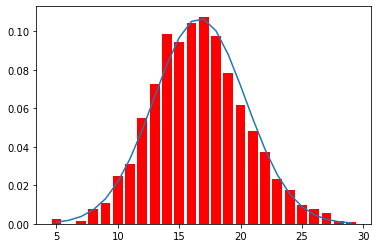

In [64]:
binomial_histogram(1/6,100,1200)

In [67]:
import numpy as np
def sigmoid(x): #시그모이드 함수, 로지스틱 함수와 같은 함수이다.
  return 1/(1+np.e**(-x))

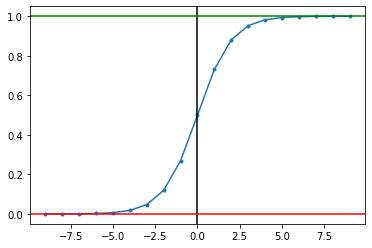

In [69]:
xs = range(1-10,10)
ys = [sigmoid(x) for x in xs]
plt.plot(xs,ys,marker='.')
plt.axvline(x=0,color='black')
plt.axhline(y=0,color='red')
plt.axhline(y=1,color='green')
plt.show()

In [70]:
def gradient(y,x,w,b):
  wd = x*(sigmoid(w*x+b)-y)
  bd = (sigmoid(w*x+b)-y)
  return wd,bd

In [77]:
def gradient_descent(xs,ys,lr=0.001,epochs=100):
  if isinstance(xs,list):
    xs = np.array(xs).reshpae(-1)
  wbhl = [] # 학습 과정에서의 가중치와 편향을 보관하기 위함  

  wp = np.random.uniform(-1,1) #초기 가중치를 랜덤하게 결정
  bp = np.random.uniform(-1,1) #초기 편향

  for epoch in range(epochs):
    for i,x in enumerate(xs):
      wd,bd = gradient(ys[i],x,wp,bp) #경사를 구함
      wp = wp - (wd*lr) #가중치를 경사*lr만큼 빼 줌 (곡선의 아래 부분으로 이동)
      bp = bp - (bd*lr) #편향을 경사 *lr만큼 빼줌 (곡선의 아래 부분으로 이동)
    wbhl.append([wp,bp])
  return wp,bp,wbhl

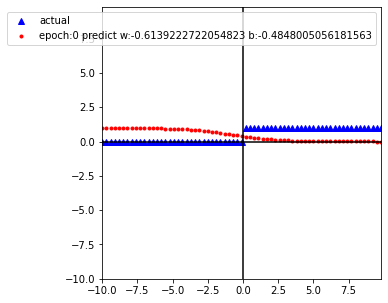

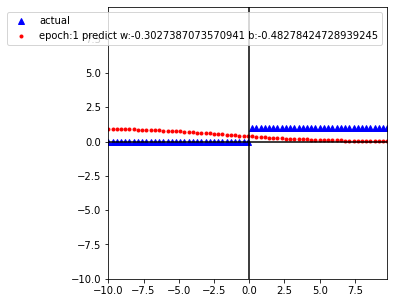

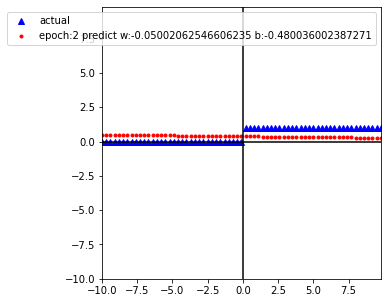

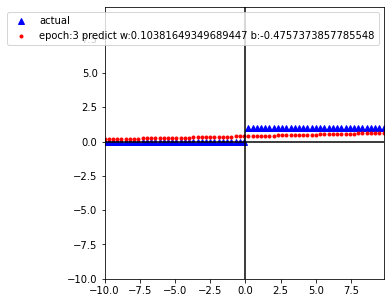

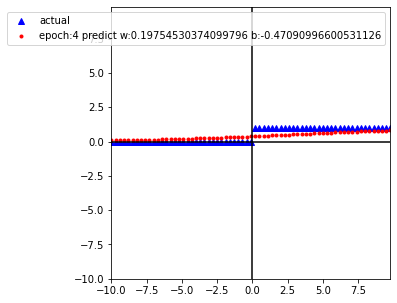

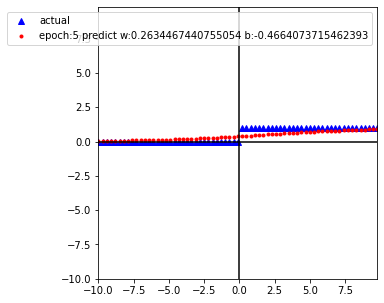

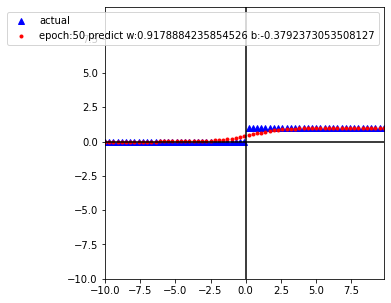

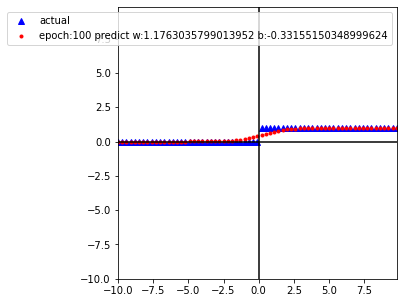

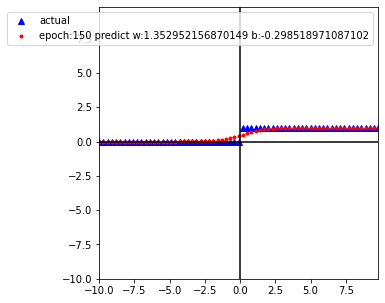

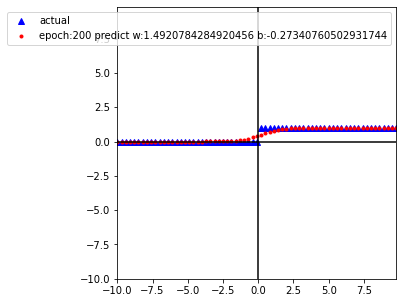

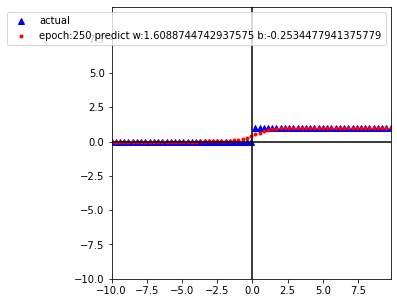

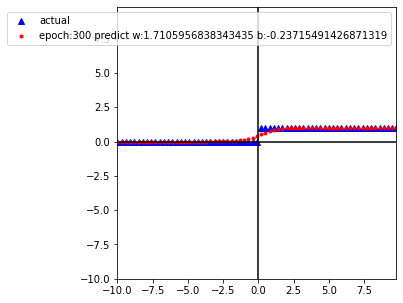

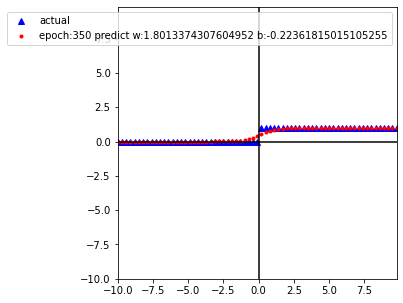

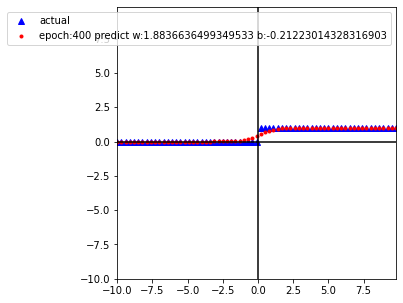

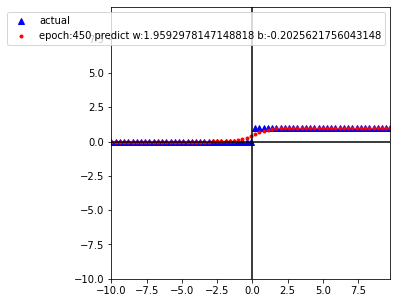

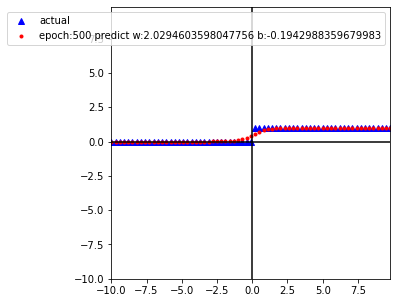

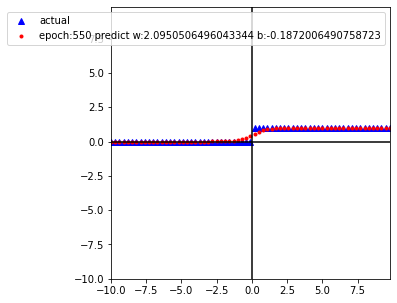

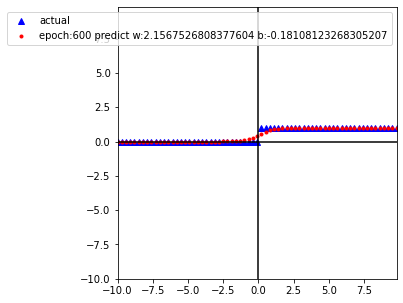

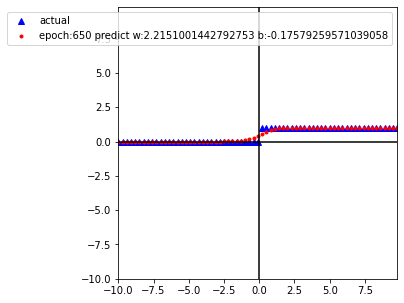

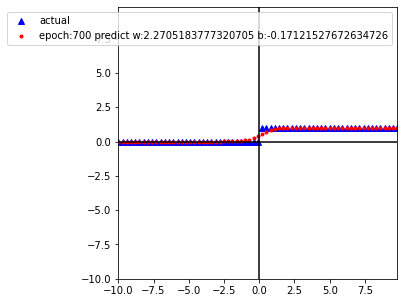

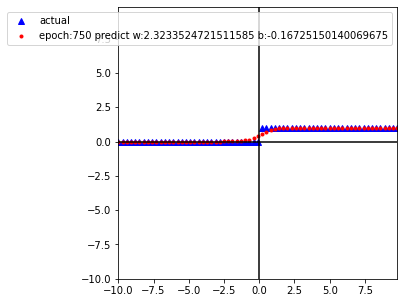

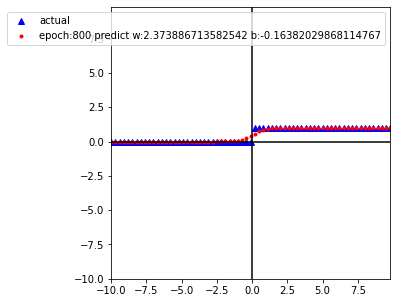

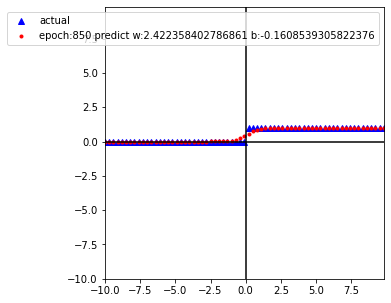

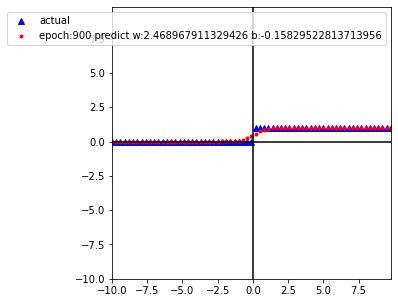

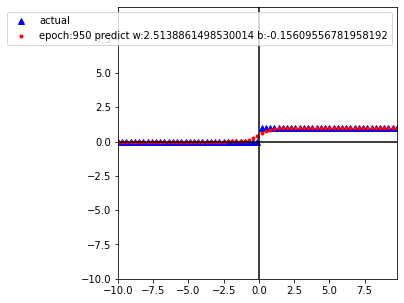

In [86]:
xs=np.arange(-10,10,0.3)
ys=np.array([1 if x>0 else 0 for x in xs])
#ys

wp,bp,wbhl=gradient_descent(xs,ys,epochs=1000)
min_val=min(min(xs),min(ys))
max_val=max(max(xs),max(ys))

for wi in range(len(wbhl)):
  if wi>5 and wi%50!=0:
    continue
  w,b=wbhl[wi]
  pre_ys=[sigmoid(w*x+b) for x in xs]
  plt.figure(figsize=(5,5))
  plt.plot(xs,ys,'b^',label='actual') #실제값을 도면에 뿌림
  plt.plot(xs,pre_ys,'r.',label=f"epoch:{wi} predict w:{w} b:{b}")
  plt.axvline(x=0,color='black')
  plt.axhline(y=0,color='black')
  plt.xlim(min_val,max_val)
  plt.ylim(min_val,max_val)
  plt.legend()
  plt.show()


In [87]:
xs2 = [[x] for x in xs]

In [88]:
from sklearn.model_selection import train_test_split

In [92]:
train_xs, test_xs, train_ys, test_ys = train_test_split(xs2,ys)

In [93]:
len(xs2), len(ys), len(train_xs), len(test_xs),len(train_ys), len(test_ys)

(67, 67, 50, 17, 50, 17)

In [94]:
from sklearn.linear_model import LogisticRegression

In [99]:
lr_model=LogisticRegression() #모델 개체 생성
lr_model.fit(train_xs,train_ys)#공부하자
pre_vals=lr_model.predict(test_xs) #예측해라
for i,y in enumerate(test_ys):
  print(f"actual:{y} predict:{pre_vals[i]}")

actual:0 predict:0
actual:1 predict:1
actual:0 predict:0
actual:1 predict:1
actual:0 predict:0
actual:0 predict:0
actual:0 predict:0
actual:1 predict:1
actual:1 predict:1
actual:0 predict:0
actual:0 predict:0
actual:0 predict:0
actual:0 predict:0
actual:1 predict:1
actual:1 predict:1
actual:1 predict:1
actual:1 predict:1


In [100]:
print(lr_model.score(train_xs,train_ys))
print(lr_model.score(test_xs,test_ys))

1.0
1.0


5<x 일 때 99.7% 확률로 1


2<x<=5 수 일 때 90% 확률로 1


0<x<=2일 때 70% 확률로 1


x<=0일때 0% 확률로 1

In [106]:
xs = np.arange(-10,10,0.3)
ys1 = []
for x in xs:
  if x>5:
    if np.random.uniform(0,10)>0.03: #0~10 사이의 랜덤한 수가 0.03보다 크면
      ys1.append(1)
    else:
      ys1.append(0)
  elif x>2:
    if np.random.uniform(0,10)>1:
      ys1.append(1)
    else:
      ys1.append(0)
  elif x>0:
    if np.random.uniform(0,10)>3:
      ys1.append(1)
    else:
      ys1.append(0)
  else:
    ys1.append(0)


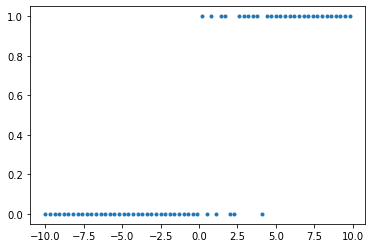

In [107]:
plt.plot(xs,ys1,'.')
plt.show()

In [108]:
from sklearn.datasets import load_iris

In [109]:
iris_data = load_iris()
iris_data

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

In [110]:
data = iris_data['data']
target = iris_data['target']
tnames = iris_data['target_names']
for i,y in enumerate(target):
  print(f'{i}:{tnames[y]}')

0:setosa
1:setosa
2:setosa
3:setosa
4:setosa
5:setosa
6:setosa
7:setosa
8:setosa
9:setosa
10:setosa
11:setosa
12:setosa
13:setosa
14:setosa
15:setosa
16:setosa
17:setosa
18:setosa
19:setosa
20:setosa
21:setosa
22:setosa
23:setosa
24:setosa
25:setosa
26:setosa
27:setosa
28:setosa
29:setosa
30:setosa
31:setosa
32:setosa
33:setosa
34:setosa
35:setosa
36:setosa
37:setosa
38:setosa
39:setosa
40:setosa
41:setosa
42:setosa
43:setosa
44:setosa
45:setosa
46:setosa
47:setosa
48:setosa
49:setosa
50:versicolor
51:versicolor
52:versicolor
53:versicolor
54:versicolor
55:versicolor
56:versicolor
57:versicolor
58:versicolor
59:versicolor
60:versicolor
61:versicolor
62:versicolor
63:versicolor
64:versicolor
65:versicolor
66:versicolor
67:versicolor
68:versicolor
69:versicolor
70:versicolor
71:versicolor
72:versicolor
73:versicolor
74:versicolor
75:versicolor
76:versicolor
77:versicolor
78:versicolor
79:versicolor
80:versicolor
81:versicolor
82:versicolor
83:versicolor
84:versicolor
85:versicolor
86:ver

In [111]:
sepal_lengths = data[:50,[0]] #setosa 품종의 sepal_length만 추출(독립변수로 사용하기 위해 2차원 배열)
sepal_widths = data[:50,1] #setosa 품종의 sepal_width만 추출(종속변수로 사용하기 위해 1차원 배열)

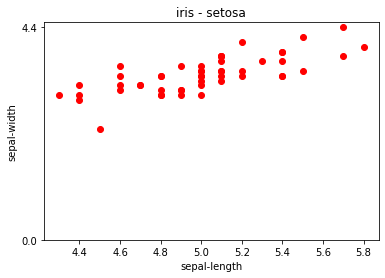

In [112]:
import matplotlib.pyplot as plt
plt.plot(sepal_lengths[:,0],sepal_widths,'ro',label='setosa')
plt.xlabel('sepal-length')
plt.ylabel('sepal-width')
plt.yticks([0,max(sepal_widths)])
plt.title('iris - setosa')
plt.show()

In [113]:
train_xs = sepal_lengths[:len(sepal_lengths)*2//3]
train_ys = sepal_widths[:len(sepal_widths)*2//3]
test_xs = sepal_lengths[len(sepal_lengths)*2//3:]
test_ys = sepal_widths[len(sepal_widths)*2//3:]
print(f"학습용 길이:{len(train_ys)} 테스트용 길이:{len(test_ys)}")


학습용 길이:33 테스트용 길이:17
